In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, matthews_corrcoef
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

In [8]:
# Data hewan peliharaan
hewan = {
    'tinggi': [30, 35, 45, 40, 25, 30, 50, 28, 48],
    'berat': [5, 8, 10, 12, 3, 4, 6, 4, 9],
    'jenis': ['kucing', 'kucing', 'anjing', 'anjing', 'kucing', 'kucing', 'anjing', 'kucing', 'anjing']
}

hewan_df = pd.DataFrame(hewan)
hewan_df

,tinggi,berat,jenis
0,30,5,kucing
1,35,8,kucing
2,45,10,anjing
3,40,12,anjing
4,25,3,kucing
5,30,4,kucing
6,50,6,anjing
7,28,4,kucing
8,48,9,anjing


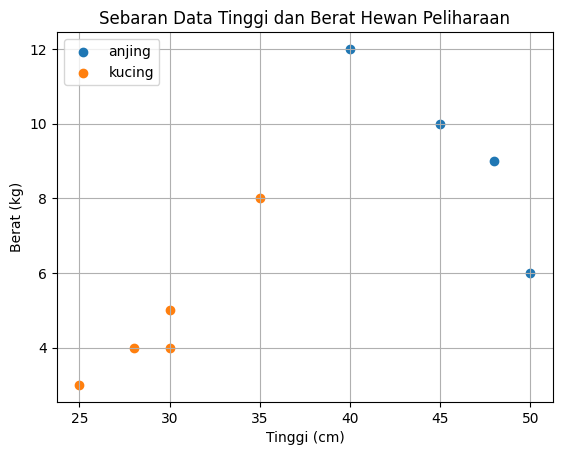

In [9]:
# Visualisasi data
fig, ax = plt.subplots()
for jenis, data in hewan_df.groupby('jenis'):
    ax.scatter(data['tinggi'], data['berat'], label=jenis)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi dan Berat Hewan Peliharaan')
plt.xlabel('Tinggi (cm)')
plt.ylabel('Berat (kg)')
plt.grid(True)
plt.show()

In [10]:
# Preprocessing data
X_train = np.array(hewan_df[['tinggi', 'berat']])
y_train = np.array(hewan_df['jenis'])

le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [11]:
# Training model KNN
K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
# Data untuk prediksi
tinggi_misterius = 35
berat_misterius = 7
misterius_data = np.array([[tinggi_misterius, berat_misterius]])

In [13]:
# Prediksi
predicted_species = le.inverse_transform(model.predict(misterius_data))[0]
print(f'Prediksi jenis untuk tinggi {tinggi_misterius} cm dan berat {berat_misterius} kg: {predicted_species}')

Prediksi jenis untuk tinggi 35 cm dan berat 7 kg: kucing


In [14]:
# Menambahkan jarak ke dataframe
misterius_jarak = [euclidean(misterius_data[0], data) for data in X_train]
hewan_df['jarak'] = misterius_jarak

In [15]:
# Mengurutkan berdasarkan jarak
hewan_df_sorted = hewan_df.sort_values('jarak')
print('Data diurutkan berdasarkan jarak dari titik misterius:')
print(hewan_df_sorted)

Data diurutkan berdasarkan jarak dari titik misterius:
   tinggi  berat   jenis      jarak
1      35      8  kucing   1.000000
0      30      5  kucing   5.385165
5      30      4  kucing   5.830952
3      40     12  anjing   7.071068
7      28      4  kucing   7.615773
2      45     10  anjing  10.440307
4      25      3  kucing  10.770330
8      48      9  anjing  13.152946
6      50      6  anjing  15.033296


In [16]:
# Data untuk pengujian
X_test = np.array([[32, 6], [44, 9], [37, 5], [26, 3], [45, 11], [28, 4]])
y_test = le.transform(['kucing', 'anjing', 'kucing', 'kucing', 'anjing', 'kucing'])


In [17]:
# Prediksi pada data pengujian
y_pred = model.predict(X_test)

In [18]:
# Evaluasi model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cls_report = classification_report(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print(f'Akurasi: {acc}')
print(f'Presisi: {prec}')
print(f'Recall: {rec}')
print(f'Skor F1: {f1}')
print(f'Laporan Klasifikasi:\n{cls_report}')
print(f'Koefisien Korelasi Matthew: {mcc}')

Akurasi: 1.0
Presisi: 1.0
Recall: 1.0
Skor F1: 1.0
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         4

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Koefisien Korelasi Matthew: 1.0
